## Data

Before running this notebook, be sure to follow these steps:

1. Download the `VM2Uniform--MA--2022-08-19` zip from https://drive.google.com/drive/folders/1DyCevtTWTMMNrZXsCycLGiSA_uc6lq8r

2. Extract `VM2Uniform--MA--2022-08-19.tab` to `../data/VM2--MA--2022-08-19/`

3. Run `deliverable_1.ipynb` to generate the GEOID10 to Social Vulnerability Index table

In [1]:
import pandas as pd
import numpy as np

In [178]:
suffolk_start_idx = 3500000
num_rows = 500000

uniform_2022_MA = pd.read_csv("../data/VM2--MA--2022-08-19/VM2Uniform--MA--2022-08-19.tab", delimiter="\t", skiprows= range(1, suffolk_start_idx), nrows=num_rows, encoding = "ISO-8859-1")

C:\Users\ivanb\AppData\Local\Temp\ipykernel_3456\1825538002.py:3: DtypeWarning: Columns (19,26,27,30,31,50,57,58,61,62,74,78,87,88,89,90,91,92,93,113,114,115,117,126,189,304,325,392,393,396,400,401,402,403,404,405,406,408,409,411,412,414,421,422,423,433,444,445,446,447,448,451,453,454,457,458,459,463,465,468,473,474,479,481,697,702,706,711,715,720,729,733,738,742,746,747) have mixed types. Specify dtype option on import or set low_memory=False.
  uniform_2022_MA = pd.read_csv("../data/VM2--MA--2022-08-19/VM2Uniform--MA--2022-08-19.tab", delimiter="\t", skiprows= range(1, 3600000), nrows=500000, encoding = "ISO-8859-1")


In [250]:
uniform_subset = uniform_2022_MA[["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]
uniform_subset.dropna(subset=["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"], inplace=True)

C:\Users\ivanb\AppData\Local\Temp\ipykernel_3456\3760245955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_subset.dropna(subset=["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"], inplace=True)


In [251]:
# only keep SUFFOLK
uniform_subset = uniform_subset[uniform_subset["Voters_FIPS"] == 25]
uniform_subset

,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,LALMA162975018,SUFFOLK,25,30302.0,1046.0,NaN,Y,Y,NaN,NaN,Y
1,LALMA162975305,SUFFOLK,25,30302.0,1046.0,NaN,Y,Y,Y,Y,Y
2,LALMA162981493,SUFFOLK,25,30302.0,1046.0,NaN,NaN,Y,Y,Y,Y
3,LALMA604129415,SUFFOLK,25,30302.0,1046.0,NaN,NaN,NaN,NaN,NaN,NaN
4,LALMA162426442,SUFFOLK,25,30302.0,1046.0,NaN,Y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
405339,LALMA160261796,SUFFOLK,25,180101.0,1005.0,NaN,NaN,NaN,Y,NaN,NaN
405340,LALMA160176569,SUFFOLK,25,180101.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN
405341,LALMA162563868,SUFFOLK,25,180101.0,1005.0,NaN,Y,NaN,Y,NaN,NaN
405342,LALMA162736655,SUFFOLK,25,180101.0,1005.0,NaN,Y,Y,Y,Y,Y


In [252]:
# replace voter NAN with 0 Y with 1

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace(np.nan, 0)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace("Y", 1)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]

,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,0.0,1,1,0,0,1
1,0.0,1,1,1,1,1
2,0.0,0,1,1,1,1
3,0.0,0,0,0,0,0
4,0.0,1,0,0,0,0
...,...,...,...,...,...,...
405339,0.0,0,0,1,0,0
405340,0.0,0,0,0,0,0
405341,0.0,1,0,1,0,0
405342,0.0,1,1,1,1,1


In [253]:
# convert to int first
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(int)

# then to string
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(str)

In [254]:
uniform_subset["Voters_FIPS"] = uniform_subset["Voters_FIPS"].str.zfill(3)
uniform_subset

uniform_subset["Residence_Addresses_CensusTract"] = uniform_subset["Residence_Addresses_CensusTract"].str.zfill(5)
uniform_subset

uniform_subset["Residence_Addresses_CensusBlock"] = uniform_subset["Residence_Addresses_CensusBlock"].str.zfill(4)
uniform_subset

,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,LALMA162975018,SUFFOLK,025,30302,1046,0.0,1,1,0,0,1
1,LALMA162975305,SUFFOLK,025,30302,1046,0.0,1,1,1,1,1
2,LALMA162981493,SUFFOLK,025,30302,1046,0.0,0,1,1,1,1
3,LALMA604129415,SUFFOLK,025,30302,1046,0.0,0,0,0,0,0
4,LALMA162426442,SUFFOLK,025,30302,1046,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
405339,LALMA160261796,SUFFOLK,025,180101,1005,0.0,0,0,1,0,0
405340,LALMA160176569,SUFFOLK,025,180101,1005,0.0,0,0,0,0,0
405341,LALMA162563868,SUFFOLK,025,180101,1005,0.0,1,0,1,0,0
405342,LALMA162736655,SUFFOLK,025,180101,1005,0.0,1,1,1,1,1


https://www.mass.gov/info-details/massgis-data-2010-us-census

The tables in each of the aforementioned databases all contain the field LOGRECNO which serves as the unique identifier for the purpose of linking to the various 2010 Census geographies provided by MassGIS.  Furthermore, most of the tables also contain a GEOID10 field added by MassGIS that represents a unique geographic  ID and is generated by a concatenation of constituent geography codes:

i.e. 250092213001002 = STATE CODE (“25” for MA) + COUNTY (“009” – Essex County) + CENSUS TRACT (“221300”) + CENSUS BLOCK (“1002”)

In [255]:
# we only focus on CENSUS TRACT here

uniform_subset["GEOID10"] = str(25) + uniform_subset["Voters_FIPS"] + uniform_subset["Residence_Addresses_CensusTract"] # + uniform_subset["Residence_Addresses_CensusBlock"]
print(f'found {len(uniform_subset["GEOID10"].unique())} unique GEOIDs')
uniform_subset

found 212 unique GEOIDs


,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002,GEOID10
0,LALMA162975018,SUFFOLK,025,30302,1046,0.0,1,1,0,0,1,2502530302
1,LALMA162975305,SUFFOLK,025,30302,1046,0.0,1,1,1,1,1,2502530302
2,LALMA162981493,SUFFOLK,025,30302,1046,0.0,0,1,1,1,1,2502530302
3,LALMA604129415,SUFFOLK,025,30302,1046,0.0,0,0,0,0,0,2502530302
4,LALMA162426442,SUFFOLK,025,30302,1046,0.0,1,0,0,0,0,2502530302
...,...,...,...,...,...,...,...,...,...,...,...,...
405339,LALMA160261796,SUFFOLK,025,180101,1005,0.0,0,0,1,0,0,25025180101
405340,LALMA160176569,SUFFOLK,025,180101,1005,0.0,0,0,0,0,0,25025180101
405341,LALMA162563868,SUFFOLK,025,180101,1005,0.0,1,0,1,0,0,25025180101
405342,LALMA162736655,SUFFOLK,025,180101,1005,0.0,1,1,1,1,1,25025180101


In [256]:
total_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).count()
voted_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).sum()

In [257]:
# turnout
turnout_per_year_by_GEOID10 = voted_voters / total_voters

# save
turnout_per_year_by_GEOID10.to_csv("turnout_per_year_by_GEOID10.csv")

turnout_per_year_by_GEOID10 = turnout_per_year_by_GEOID10.reset_index()
turnout_per_year_by_GEOID10["GEOID10"] = turnout_per_year_by_GEOID10["GEOID10"].astype(np.int64)

turnout_per_year_by_GEOID10

,GEOID10,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,2502500101,0.0,0.476871,0.223717,0.185029,0.164844,0.134567
1,2502500102,0.0,0.375646,0.192993,0.159678,0.141298,0.106261
2,2502500201,0.0,0.502951,0.249157,0.215008,0.171164,0.143339
3,2502500202,0.0,0.455312,0.264334,0.240725,0.211214,0.179595
4,2502500301,0.0,0.519956,0.301552,0.259424,0.218958,0.191242
...,...,...,...,...,...,...,...
207,25025981201,0.0,0.375000,0.250000,0.000000,0.000000,0.125000
208,25025981202,0.0,0.451613,0.290323,0.225806,0.193548,0.258065
209,25025981502,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
210,25025981700,0.0,0.857143,0.285714,0.428571,0.571429,0.428571


In [258]:
calls_svidx_df = pd.read_csv("data/calls_svidx_df.csv").drop(["Unnamed: 0"], axis=1)

calls_svidx_df

,CT_ID_10,NUM_CALLS,POP100_RE,Name,SV_IDX,CALLS_PER_POP
0,25025000100,18353,4254,Brighton,0.302320,4.314292
1,25025000201,13992,3854,Brighton,0.209524,3.630514
2,25025000202,13251,3885,Brighton,0.398954,3.410811
3,25025000301,10379,2740,Brighton,0.274417,3.787956
4,25025000302,10431,3142,Brighton,0.319505,3.319860
...,...,...,...,...,...,...
172,25025981202,2067,207,South Boston Waterfront,0.000000,9.985507
173,25025981300,1174,389,East Boston,0.111411,3.017995
174,25025981501,795,12,Back Bay,0.072193,66.250000
175,25025981502,91,9,East Boston,0.018031,10.111111


In [266]:
svidx_voter_turnout = calls_svidx_df.join(turnout_per_year_by_GEOID10.set_index('GEOID10'), on='CT_ID_10')

subset_svidx_voter_turnout = svidx_voter_turnout.dropna()

subset_svidx_voter_turnout.head()

,CT_ID_10,NUM_CALLS,POP100_RE,Name,SV_IDX,CALLS_PER_POP,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
121,25025100100,15519,5510,Roxbury,0.863899,2.816515,0.0,0.358926,0.273302,0.248341,0.201580,0.132070
122,25025100200,9033,2787,Mattapan,0.559635,3.241119,0.0,0.398851,0.285057,0.279310,0.249425,0.168966
123,25025100300,11487,3303,Mattapan,0.774576,3.477748,0.0,0.407569,0.307525,0.295781,0.264898,0.180078
124,25025100400,17362,4865,Mattapan,0.587071,3.568756,0.0,0.488344,0.353012,0.338783,0.296397,0.208295
125,25025100500,28227,5989,Dorchester,0.545204,4.713141,0.0,0.430067,0.290435,0.255527,0.219688,0.159181


In [ ]:
# save data to csv

subset_svidx_voter_turnout.to_csv("data/subset_svidx_voter_turnout.csv")

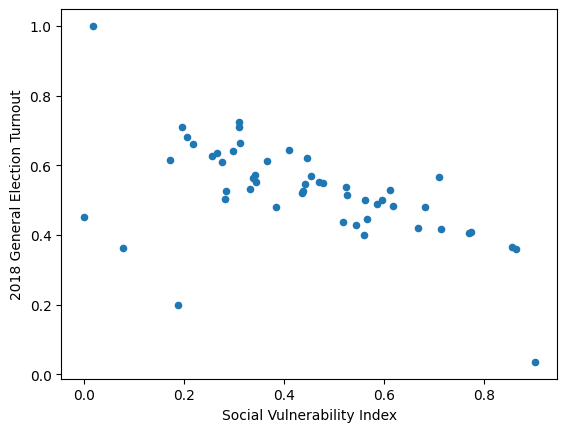

In [268]:
from matplotlib import pyplot as plt

subset_svidx_voter_turnout.plot.scatter(x = "SV_IDX", y = "General_2018")

plt.xlabel("Social Vulnerability Index")
plt.ylabel("2018 General Election Turnout")
plt.show()

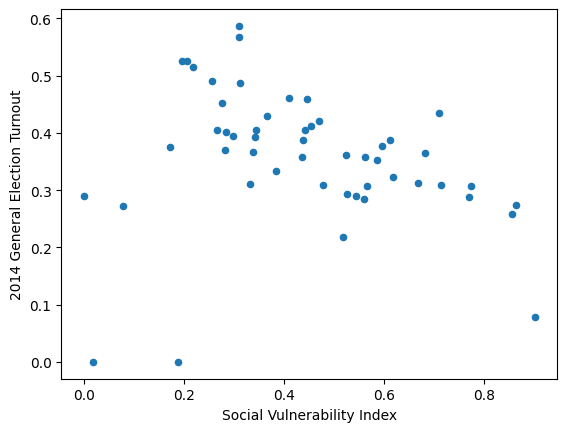

In [269]:
from matplotlib import pyplot as plt

subset_svidx_voter_turnout.plot.scatter(x = "SV_IDX", y = "General_2014")

plt.xlabel("Social Vulnerability Index")
plt.ylabel("2014 General Election Turnout")
plt.show()

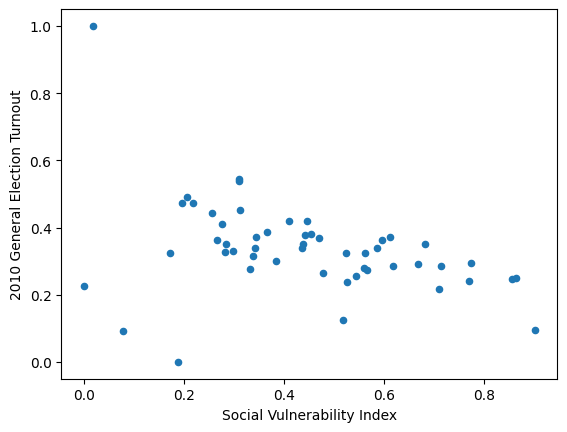

In [270]:
from matplotlib import pyplot as plt

subset_svidx_voter_turnout.plot.scatter(x = "SV_IDX", y = "General_2010")

plt.xlabel("Social Vulnerability Index")
plt.ylabel("2010 General Election Turnout")
plt.show()

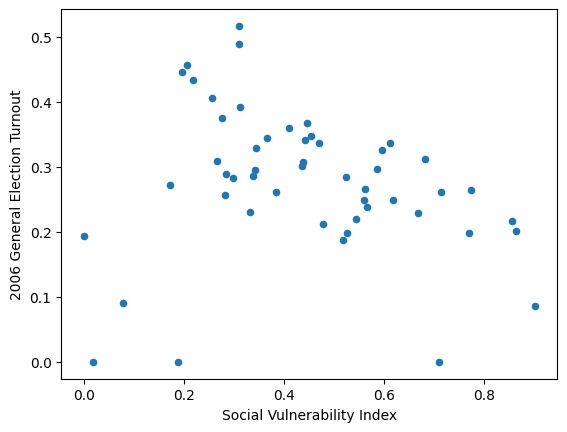

In [271]:
from matplotlib import pyplot as plt

subset_svidx_voter_turnout.plot.scatter(x = "SV_IDX", y = "General_2006")

plt.xlabel("Social Vulnerability Index")
plt.ylabel("2006 General Election Turnout")
plt.show()

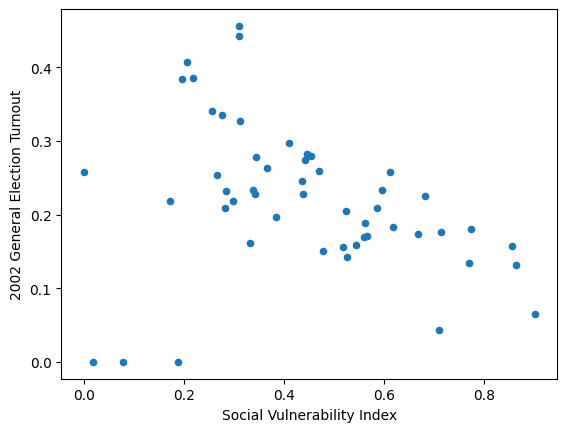

In [272]:
from matplotlib import pyplot as plt

subset_svidx_voter_turnout.plot.scatter(x = "SV_IDX", y = "General_2002")

plt.xlabel("Social Vulnerability Index")
plt.ylabel("2002 General Election Turnout")
plt.show()